<h1><center>Assignment 2 - Matrix Multiplication</center></h1>
<h2><center>COMP30250 - Parallel and Cluster Computing</center></h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gs
import numpy as np

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data.csv')
data[data['block_size'] > 1].head()


,filename,matrix_size,block_size,timing
20,blocked_ijk_atlas.out,2,2,0.000017
21,blocked_ijk_atlas.out,4,2,0.000020
22,blocked_ijk_atlas.out,4,4,0.000018
23,blocked_ijk_atlas.out,8,2,0.000026
24,blocked_ijk_atlas.out,8,4,0.000018


## Execution times

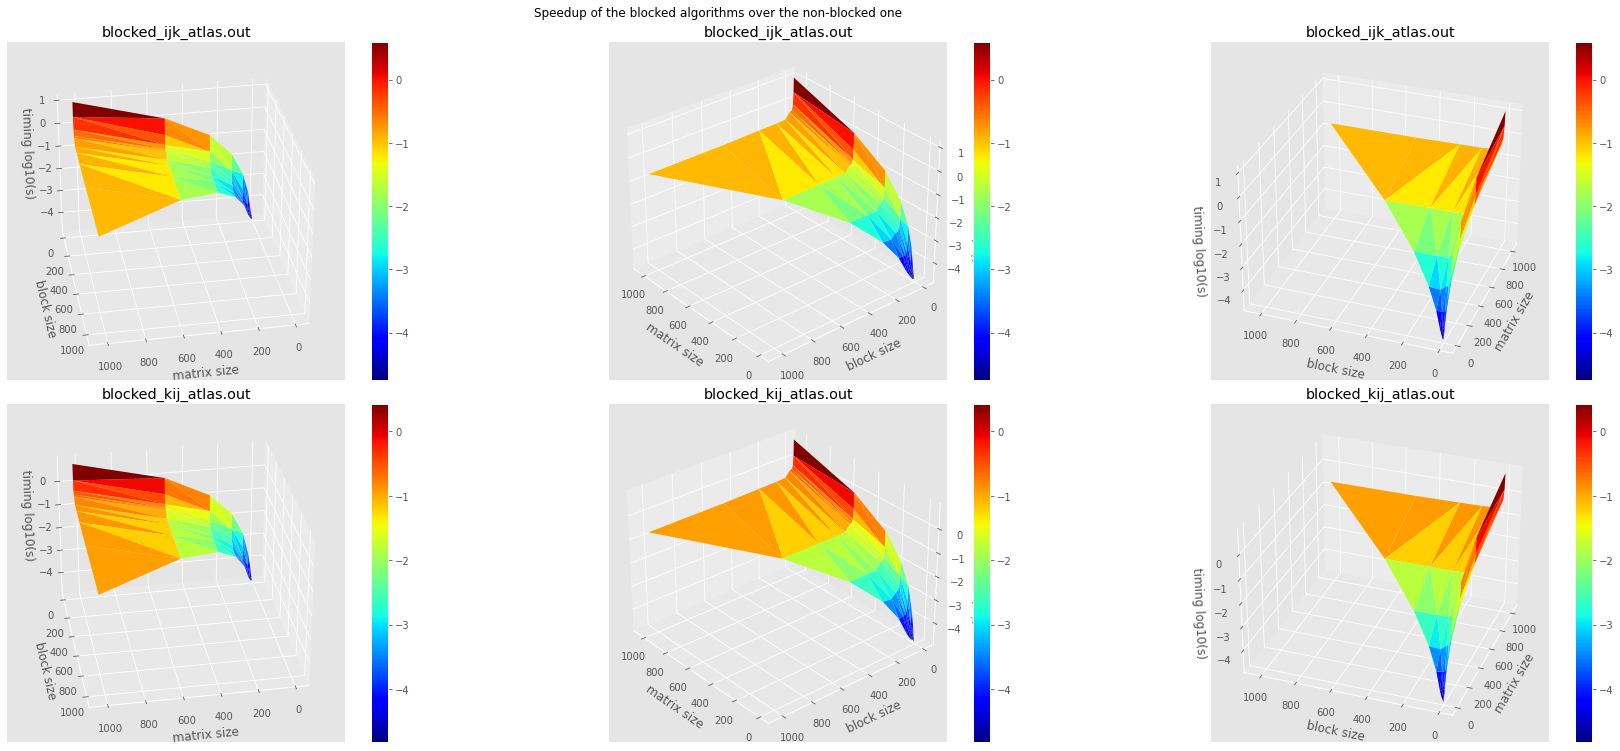

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(25, 15))
fig.suptitle("Speedup of the blocked algorithms over the non-blocked one")
spec2 = gs.GridSpec(ncols=3, nrows=3, figure=fig)
for i, f in enumerate(['blocked_ijk_atlas.out', 'blocked_kij_atlas.out']):
    Xs = np.array(data[data['filename'] == f]['matrix_size'])
    Ys = np.array(data[data['filename'] == f]['block_size'])
    Zs = np.log10(np.array(data[data['filename'] == f]['timing']))
    for j, angle in enumerate([40, 100, 160]):
        ax = fig.add_subplot(spec2[i, j], projection='3d')
        ax.set_xlabel('matrix size')
        ax.set_ylabel('block size')
        ax.set_zlabel('timing log10(s)')
        ax.set_title(f)
        ax.view_init(30, 40 + angle)
        surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=mpl.cm.jet, linewidth=0)
        fig.colorbar(surf)


## Speedup of the blocked algorithms over the non-blocked one

In [4]:
# Compute speedup over non blocked alternatives
sizes = set(data['matrix_size'])
for s in sizes:
    non_blocked_timing = data.loc[data['matrix_size'] == s].loc[data['filename'] == 'non_blocked_ijk.out'].iloc[0].at['timing']
    data.loc[data['matrix_size'] == s, 'speedup'] =  non_blocked_timing / data.loc[data['matrix_size'] == s, 'timing']

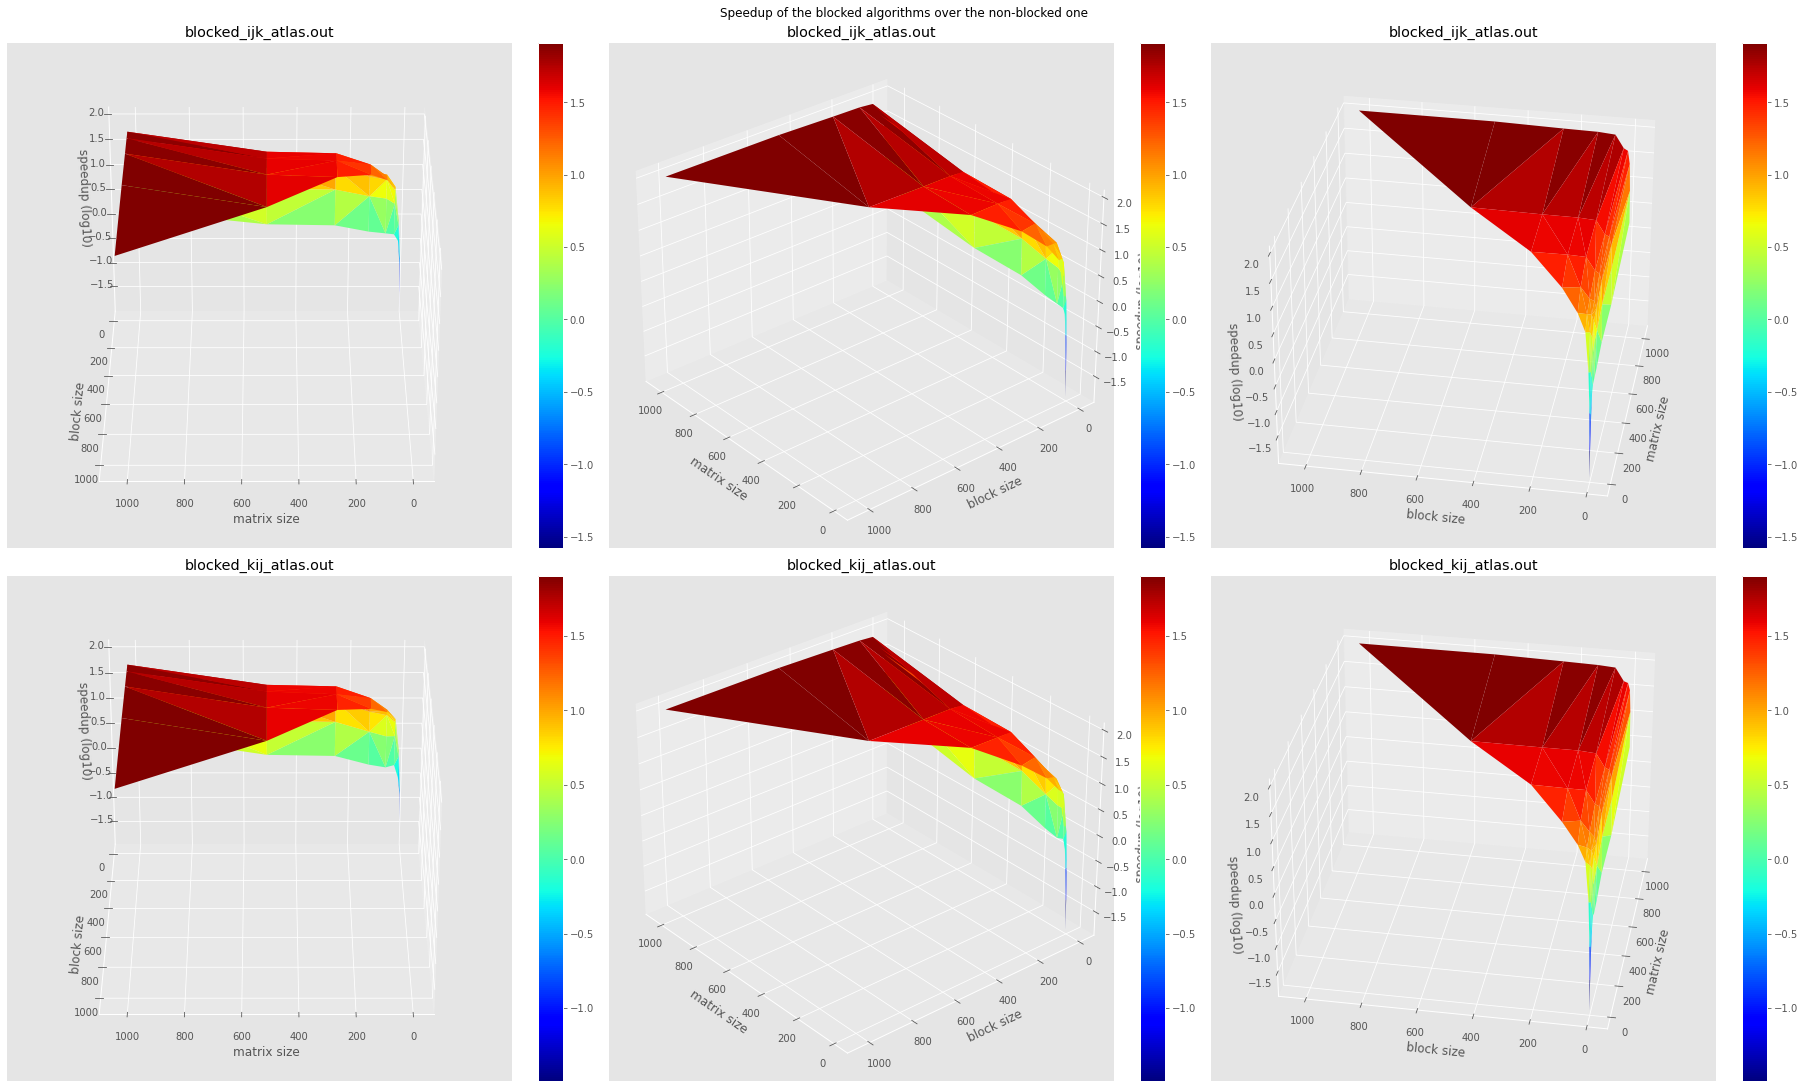

In [5]:
fig = plt.figure(constrained_layout=True, figsize=(25, 15))
fig.suptitle("Speedup of the blocked algorithms over the non-blocked one")
spec2 = gs.GridSpec(ncols=3, nrows=2, figure=fig)


for i, f in enumerate(['blocked_ijk_atlas.out', 'blocked_kij_atlas.out']):
    Xs = np.array(data[data['filename'] == f]['matrix_size'])
    Ys = np.array(data[data['filename'] == f]['block_size'])
    Zs = np.log10(np.array(data[data['filename'] == f]['speedup']))
    for j, angle in enumerate([50, 100, 150]):
        ax = fig.add_subplot(spec2[i, j], projection='3d')
        ax.set_title(f)
        ax.set_xlabel('matrix size')
        ax.set_ylabel('block size')
        ax.set_zlabel('speedup (log10)')
        ax.view_init(30, 40 + angle)
        surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=mpl.cm.jet, linewidth=0)
        fig.colorbar(surf)

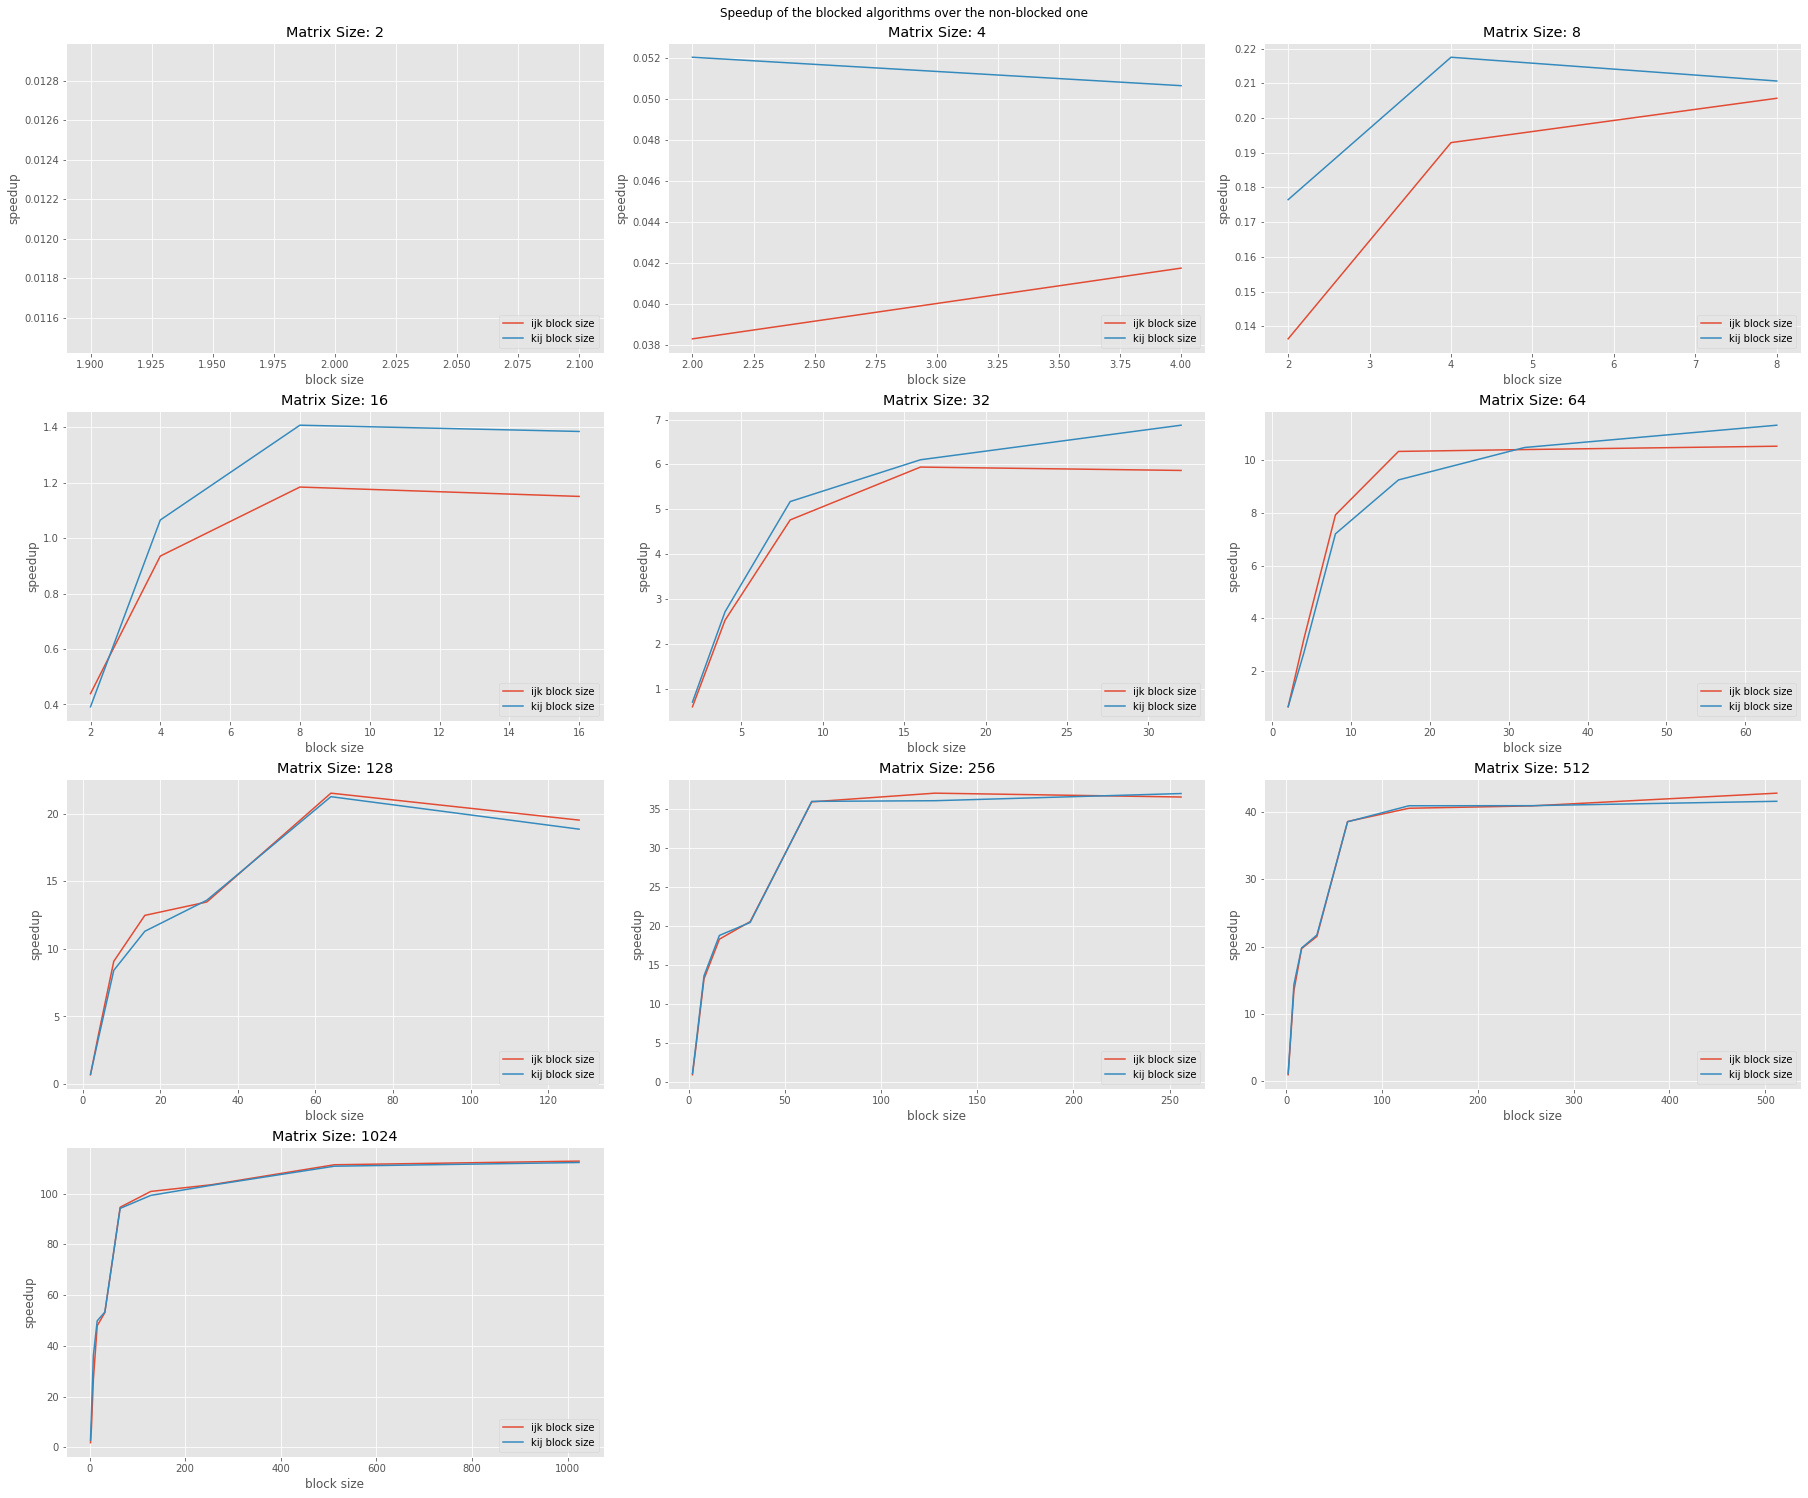

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(25, 25))
fig.suptitle("Speedup of the blocked algorithms over the non-blocked one")
spec2 = gs.GridSpec(ncols=3, nrows=5, figure=fig)
sizes = sorted(list(set(data['matrix_size'])))
for i, s in enumerate(sizes):
    ax = fig.add_subplot(spec2[i // 3, i % 3])
    subdata = data[data['matrix_size'] == s]
    bijk_data = subdata.loc[data['filename'] == 'blocked_ijk_atlas.out'].copy()
    bkij_data = subdata.loc[data['filename'] == 'blocked_kij_atlas.out'].copy()
    non_blocked_timing = subdata.loc[data['filename'] == 'non_blocked_ijk.out'].iloc[0].at['timing']
    bijk_data['speedup'] = non_blocked_timing / bijk_data['timing']
    bkij_data['speedup'] = non_blocked_timing / bkij_data['timing']
    bijk_data.plot.line(x='block_size', y=f'speedup', ax=ax)
    bkij_data.plot.line(x='block_size', y=f'speedup', ax=ax)
    ax.set_xlabel('block size')
    ax.set_ylabel('speedup')
    ax.set_title(f'Matrix Size: {s}')
    ax.legend([f'ijk block size', f'kij block size'], loc='lower right')

## Comparison with BLAS dgemm

In [16]:
# Compute speedup over blas call
sizes = set(data['matrix_size'])
for s in sizes:
    blas_simple_timing = data.loc[data['matrix_size'] == s].loc[data['filename'] == 'natural_blas.out'].iloc[0].at['timing']
    data.loc[data['matrix_size'] == s, 'speedup'] = blas_simple_timing / data.loc[data['matrix_size'] == s, 'timing']

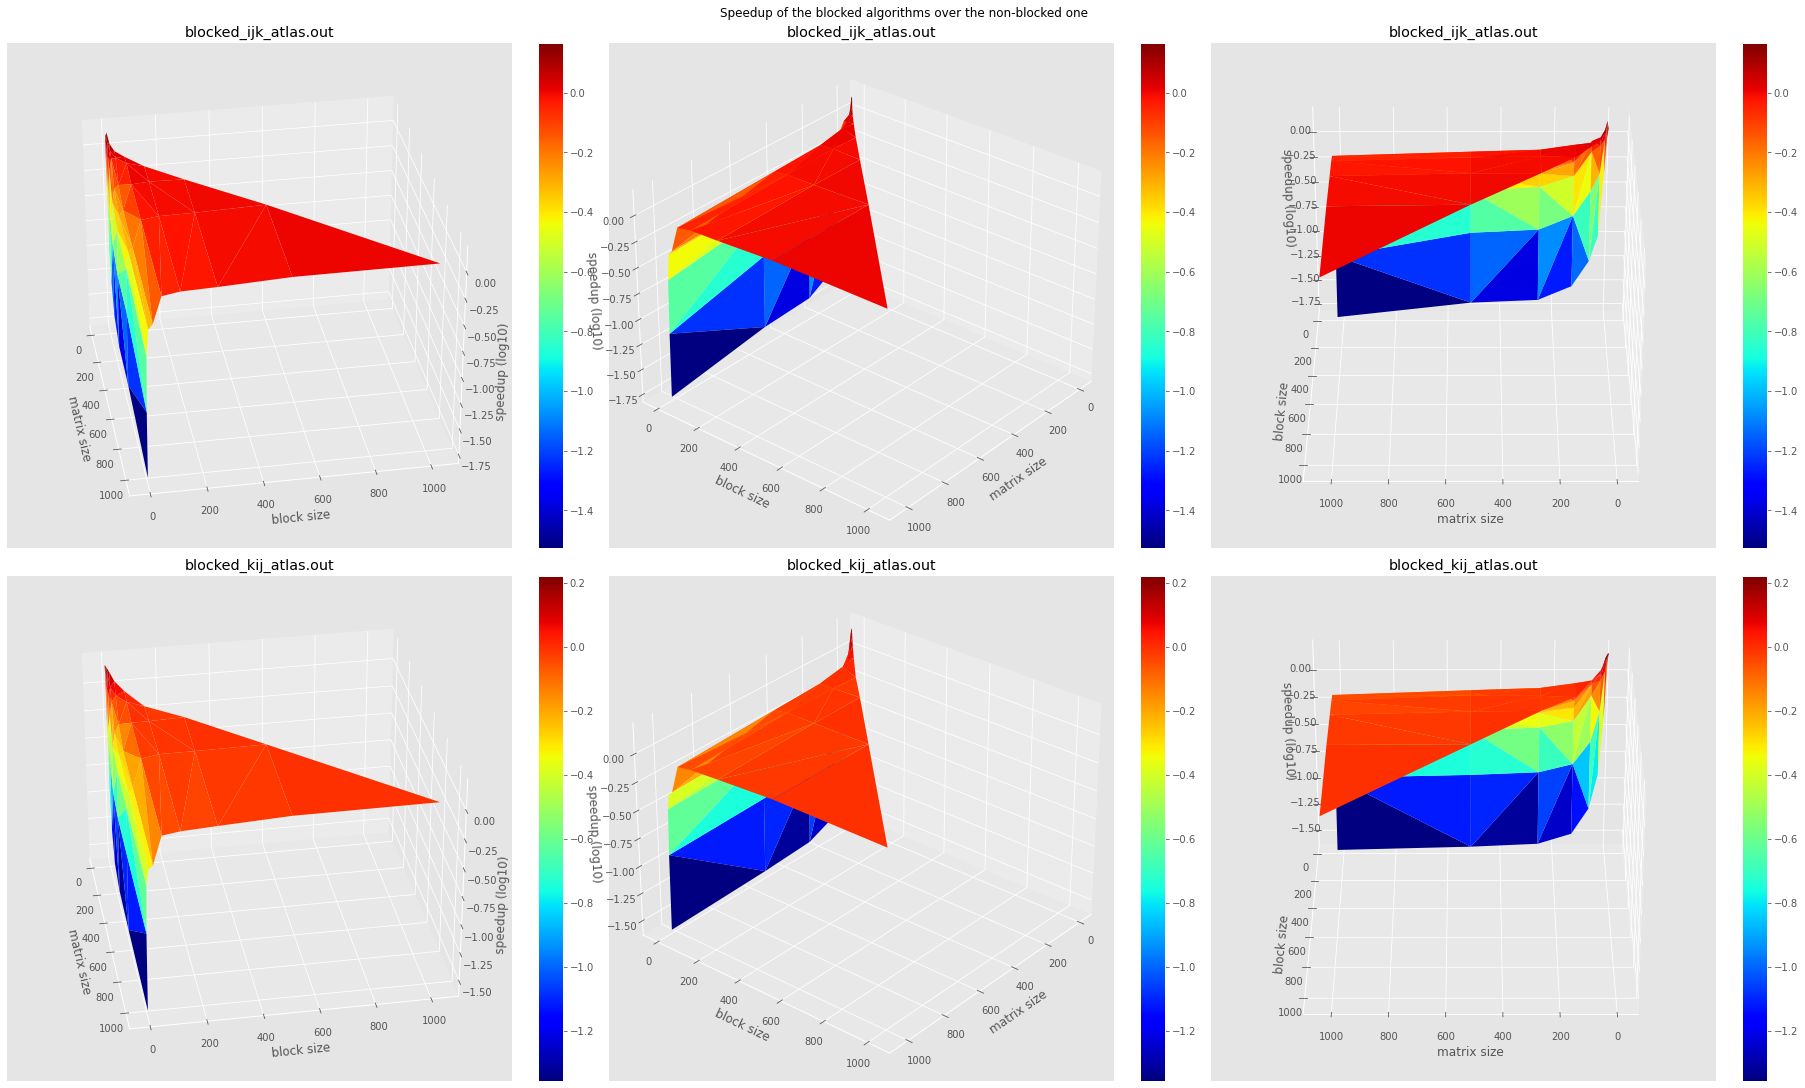

In [18]:
fig = plt.figure(constrained_layout=True, figsize=(25, 15))
fig.suptitle("Speedup of the blocked algorithms over the non-blocked one")
spec2 = gs.GridSpec(ncols=3, nrows=2, figure=fig)
for i, f in enumerate(['blocked_ijk_atlas.out', 'blocked_kij_atlas.out']):
    Xs = np.array(data[data['filename'] == f]['matrix_size'])
    Ys = np.array(data[data['filename'] == f]['block_size'])
    Zs = np.log10(np.array(data[data['filename'] == f]['speedup']))
    for j, angle in enumerate([50, 100, 150]):
        ax = fig.add_subplot(spec2[i, j], projection='3d')
        ax.set_title(f)
        ax.set_xlabel('matrix size')
        ax.set_ylabel('block size')
        ax.set_zlabel('speedup (log10)')
        ax.view_init(30, -60 + angle)
        surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=mpl.cm.jet, linewidth=0)
        fig.colorbar(surf)

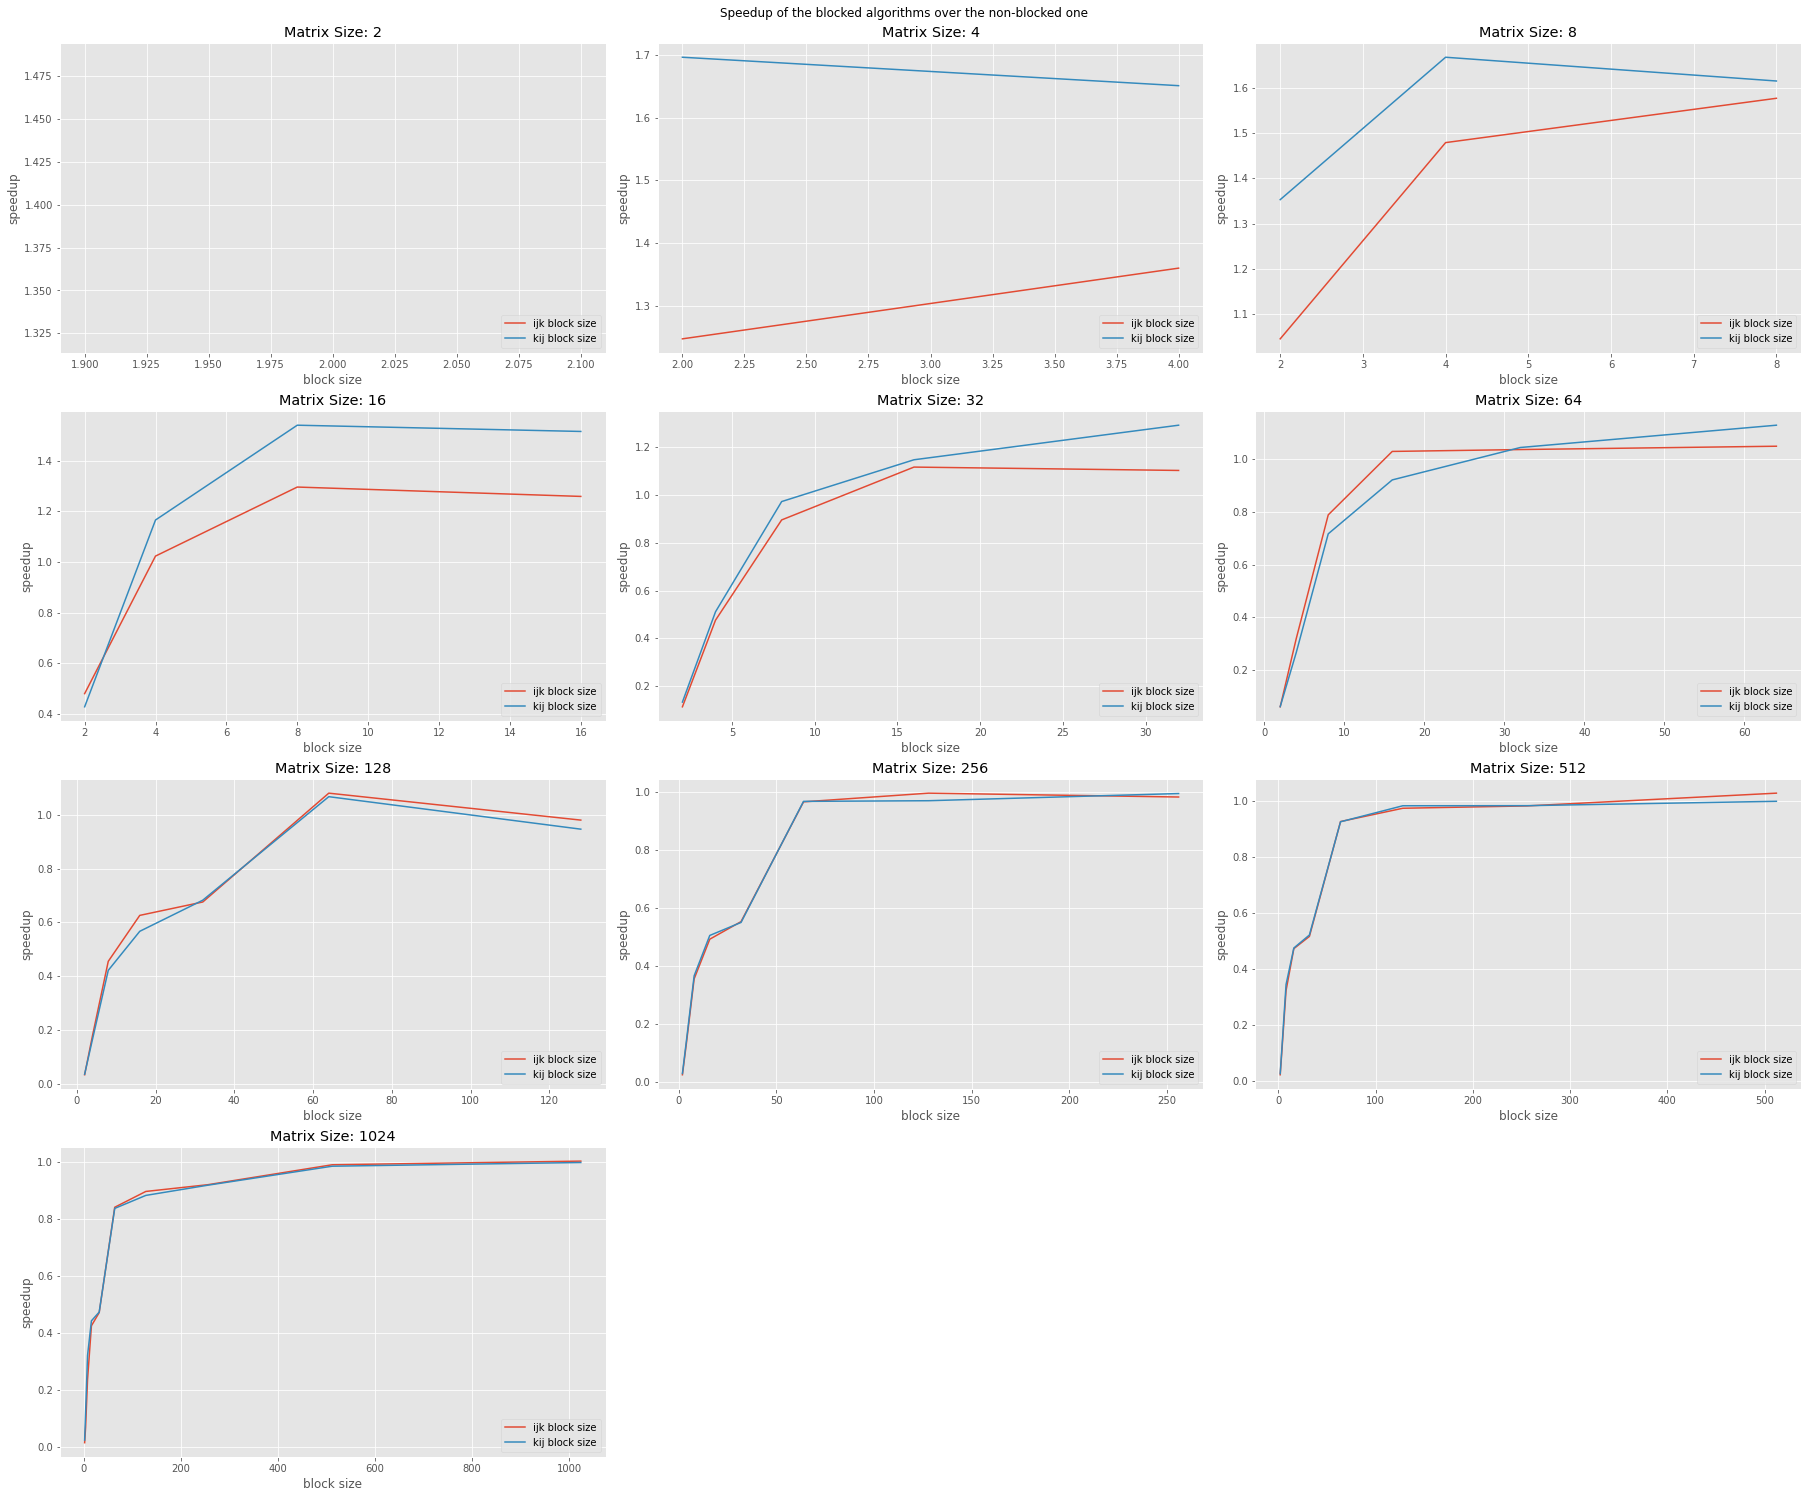

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(25, 25))
fig.suptitle("Speedup of the blocked algorithms over the non-blocked one")
spec2 = gs.GridSpec(ncols=3, nrows=5, figure=fig)
sizes = sorted(list(set(data['matrix_size'])))
for i, s in enumerate(sizes):
    ax = fig.add_subplot(spec2[i // 3, i % 3])
    subdata = data[data['matrix_size'] == s]
    bijk_data = subdata.loc[data['filename'] == 'blocked_ijk_atlas.out'].copy()
    bkij_data = subdata.loc[data['filename'] == 'blocked_kij_atlas.out'].copy()
    natural_blase = subdata.loc[data['filename'] == 'natural_blas.out'].iloc[0].at['timing']
    bijk_data['speedup'] = natural_blase / bijk_data['timing']
    bkij_data['speedup'] = natural_blase / bkij_data['timing']
    bijk_data.plot.line(x='block_size', y=f'speedup', ax=ax)
    bkij_data.plot.line(x='block_size', y=f'speedup', ax=ax)
    ax.set_xlabel('block size')
    ax.set_ylabel('speedup')
    ax.set_title(f'Matrix Size: {s}')
    ax.legend([f'ijk block size', f'kij block size'], loc='lower right')